<a href="https://colab.research.google.com/github/jafcn09/IA_1/blob/main/Semana_3_2_1M%C3%A9tricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metricas de Regresión

In [1]:
# conjunto de datos
from sklearn.datasets import make_regression
X, y = make_regression(n_samples = 1000, n_features =1, n_informative = 1, noise=10)


Text(0, 0.5, 'label')

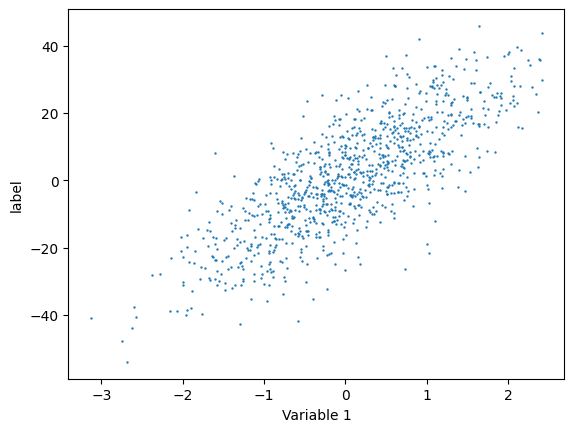

In [2]:
# gráfico del conjunto de datos
import matplotlib.pyplot as plt

plt.scatter(X, y, s=0.5)
plt.xlabel("Variable 1")# X, predictor, dimension, caracteristica, feature
plt.ylabel("label") # y, target, variable objetivo, label

In [3]:
#dividir los datos en conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

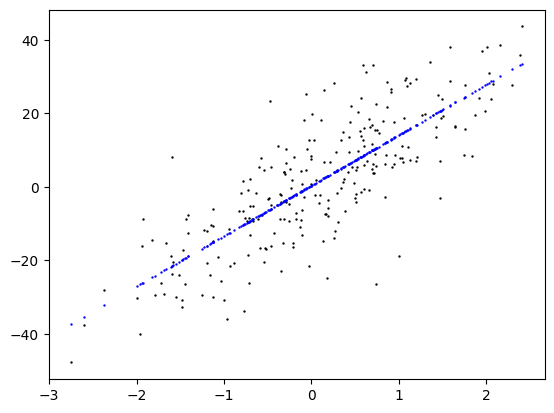

In [4]:
from sklearn.linear_model import LinearRegression
reg_lr = LinearRegression() # paramétrico
y_pred = reg_lr.fit(X_train, y_train).predict(X_test)

#plot
plt.scatter(X_test, y_test, color = 'black', s=0.5)
plt.scatter(X_test, y_pred, color = 'blue', s=0.5)

In [5]:
# implementación de cero de la métrica MAE
import numpy as np

print("nuestra implementación de MAE {}".format(np.sum(np.abs(y_pred-y_test))/len(y_test)))

#implementación con el sklearn
from sklearn.metrics import mean_absolute_error
print("implementación sklearn de MAE {}".format(mean_absolute_error(y_pred, y_test)))


nuestra implementación de MAE 8.447991339265531
implementación sklearn de MAE 8.447991339265531


In [6]:
# implementación de cero de la métrica MSE
import numpy as np
print("nuestra implementación de MSE {}".format(np.sum(np.square(y_pred-y_test))/len(y_test)))

#implementación con el sklearn
from sklearn.metrics import mean_squared_error
print("implementación sklearn de MSE {}".format(mean_squared_error(y_pred, y_test)))

nuestra implementación de MSE 113.3042389770761
implementación sklearn de MSE 113.3042389770761


In [7]:
# implementación de cero de la métrica RMSE
import numpy as np
print("nuestra implementación de RMSE {}".format(np.sqrt(np.sum(np.square(y_pred-y_test))/len(y_test))))

#implementación con el sklearn
from sklearn.metrics import mean_squared_error
print("implementación sklearn de RMSE {}".format(mean_squared_error(y_pred, y_test, squared=False)))

nuestra implementación de RMSE 10.64444639129138
implementación sklearn de RMSE 10.64444639129138


#Metricas de clasificación

In [16]:
import numpy as np
# 1 es positive, 0 es negative

# valores observados (etiqueta actual), valores que tenemos acceso
y_test = np.array([1,1,0,0,0,0,1,1,0,0,0,0,0,0])

#valores que el clasifidor predice
y_pred = np.array([1,1,0,0,1,1,1,0,0,1,0,0,1,0])

# y_pred para in valor de corte de 0.5 :  (if y'>=0.5 -> 1 else 0)

In [19]:
TP = np.sum(y_test & y_pred)
TN = np.sum((1-y_test) & (1-y_pred))
FP = sum((y_pred - y_test) == 1)
FN = sum((y_pred - y_test) == -1)

M = np.array([[TN,FP ],[FN, TP]])

print("nuestra implementación de matriz de confusión {}\n".format(M))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import confusion_matrix
print("implementación de matriz confusión sklearn: \n",confusion_matrix(y_test, y_pred))

nuestra implementación de matriz de confusión [[6 4]
 [1 3]]

[[6 4]
 [1 3]]


In [20]:
# accuracy
print("nuestra implementación de accuracy:",  (TP+TN)/(TP+TN+FP+FN))

from sklearn.metrics import accuracy_score
print("implementación de sklearn accuracy", accuracy_score(y_test, y_pred))

nuestra implementación de accuracy: 0.6428571428571429
implementación de sklearn accuracy 0.6428571428571429


In [21]:
# presición
print("nuestra implementación de presicion:", TP/(TP+FP))

from sklearn.metrics import precision_score
print("implementación de sklearn presicion", precision_score(y_test, y_pred))

nuestra implementación de presicion: 0.42857142857142855
implementación de sklearn presicion 0.42857142857142855


In [23]:
# tarea implementar el recall de cero y con la libreria del sklearn
print("nuestra implementacion de recall:", TP/(TP+FN))
from sklearn.metrics import recall_score
print("implementación de sklearn recall scorte", recall_score(y_test, y_pred))

nuestra implementacion de recall: 0.75
implementación de sklearn recall scorte 0.75


In [26]:
# score F1
from sklearn.metrics import f1_score
print("implementación de score f1", f1_score(y_test, y_pred))

implementación de score f1 0.5454545454545454


In [24]:
#reporte completo
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1']

print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.86      0.60      0.71        10
     class 1       0.43      0.75      0.55         4

    accuracy                           0.64        14
   macro avg       0.64      0.68      0.63        14
weighted avg       0.73      0.64      0.66        14



In [31]:
#Implementacion de curvas
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=2,  n_informative=2, n_redundant=0)

# dividir los datos en conjuntos entrenamiento - prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

#Definir las máquinas de aprendizaje
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression()
clf_lr.fit(X_train,y_train).predict_proba(X_test) [: , 1]

#obtener los scores
scores = clf_lr.fit(X_train,y_train).predict_proba(X_test)[:,1]

CURVAS DE PRECISION RE CALL


In [ ]:
# conjunto de datos artificial
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=2,  n_informative=2, n_redundant=0)

# dividir los datos en conjuntos entrenamiento - prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

# definir las máquinas de aprendizaje (machine learning models)
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression()

#obtener los scores
scores = clf_lr.fit(X_train,y_train).predict_proba(X_test)[:,1]

In [ ]:
#scores > 0.5
low = min(scores)
high = max(scores)

step = (low+high)/1000

threshold = np.arange(low, high,step)
threshold

for th in threshold:
  y_pred =   np.array([1 if s > th else 0  for s in scores])

  print(y_pred[0:5])

  # matriz de confusión
  TP = np.sum(y_test & y_pred)
  TN = np.sum((1-y_test) & (1-y_pred))
  FP = sum((y_pred - y_test) == 1)
  FN = sum((y_pred - y_test) == -1)

In [ ]:
threshold[20]

In [ ]:
scores[0:10]

In [ ]:
l = [s for s in scores]


l=[]
for s in scores:
  if s > th:
    l.append(1)
  else
    l.append(0)